# Resume ATS score 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import sklearn
# Filter & Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Resume.csv")
df2 = pd.read_csv("ResumeB.csv")

In [3]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
df2.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#### EDA and Visualizing the Resume dataset

In [10]:
print("numpy", np.__version__)
print("Pandas", pd.__version__)
print("Sklearn", sklearn.__version__)

numpy 1.24.3
Pandas 2.2.2
Sklearn 1.4.2


In [9]:
!pip install pandas

In [5]:
print(df1.shape)
print(df2.shape)

(2484, 4)
(962, 2)


In [6]:
print(df1.isnull().sum())
print(df2.isnull().sum())

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64
Category    0
Resume      0
dtype: int64


In [7]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [8]:
df1 = pd.read_csv("Resume.csv", usecols=['Resume_str', 'Category'])
df1.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


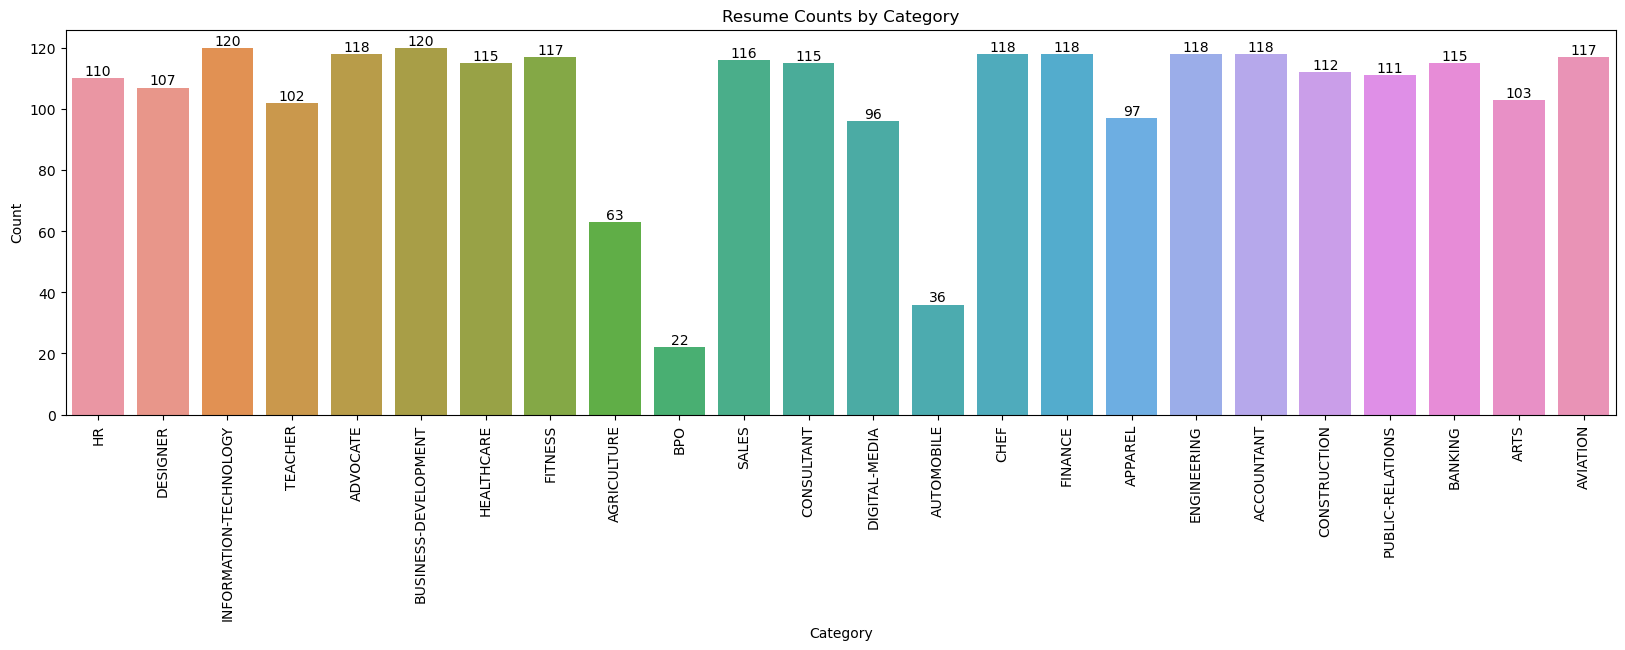

In [9]:
# Set up the figure size and rotation for x-ticks
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
# Create a count plot
ax = sns.countplot(x="Category", data=df1)

# Annotate each bar with its height (the count value)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add gridlines for clarity
plt.title("Resume Counts by Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [10]:
df1['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

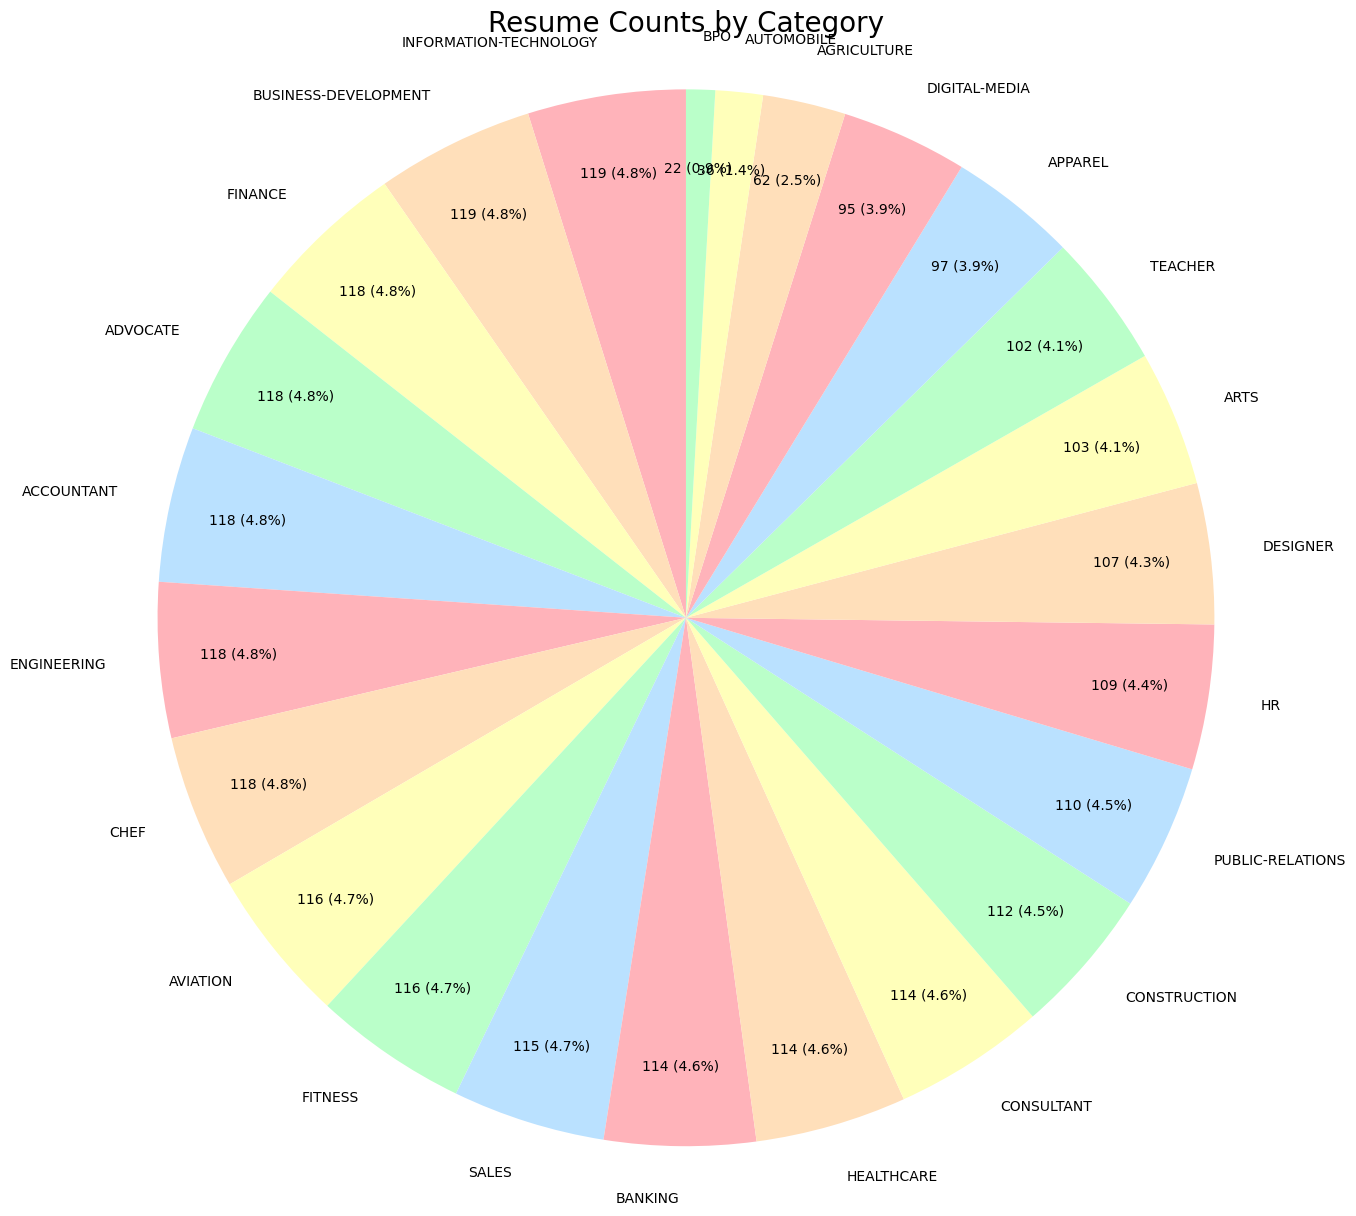

In [11]:
# Calculate the counts for each category
category_counts = df1['Category'].value_counts()

# Define light color palette
light_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Set up the figure
plt.figure(figsize=(15,15))

# Create the pie chart with better positioning of labels and percentages
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct=lambda pct: f"{int(pct * category_counts.sum() / 100)} ({pct:.1f}%)", 
    textprops={'fontsize': 10}, 
    startangle=90, 
    colors=light_colors, 
    pctdistance=0.85,  # Position percentage closer to the center
)
# Add a title
plt.title("Resume Counts by Category", fontsize=20)
# Ensure the pie is drawn as a circle
plt.axis('equal')
# Show the chart
plt.show()

In [12]:
df2['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [13]:
df2['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [14]:
df2['Category'].replace({'Hadoop': 'Data Science'}, inplace=True)

In [15]:
df1.rename(columns = {'Resume_str': 'Resume'}, inplace=True)

In [16]:
df1.duplicated('Resume').value_counts()

False    2482
True        2
Name: count, dtype: int64

In [17]:
#remove the duplicates from the dataset
df1 = df1.drop_duplicates(subset=['Resume'], keep='first')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2482 entries, 0 to 2482
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2482 non-null   object
 1   Category  2482 non-null   object
dtypes: object(2)
memory usage: 58.2+ KB


In [18]:
df = pd.concat([df1,df2])
print(df.shape)
df.sample(5)

(3444, 2)


,Resume,Category
1019,SALES Summary To obtain ...,SALES
594,BUSINESS DEVELOPMENT & MARKETING ...,BUSINESS-DEVELOPMENT
119,Education Details \r\nJanuary 2017 Rachana ...,Arts
1766,INDUSTRIAL ENGINEERING INTERN ...,ENGINEERING
663,BUSINESS DEVELOPMENT CONSULTANT ...,BUSINESS-DEVELOPMENT


In [19]:
def data_clean(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()

In [20]:
df['Cleaned_Resume'] = df['Resume'].apply(lambda x: data_clean(x))
df.sample(10)

,Resume,Category,Cleaned_Resume
2103,CITY CARRIER ASSISTANT Professi...,PUBLIC-RELATIONS,city carrier assistant professional summary a...
1094,SALES ASSOCIATE Professional Su...,SALES,sales associate professional summary sales pr...
607,Software Proficiency: â¢ Languages: Basics of...,DevOps Engineer,software proficiency languages basics of c sql...
1746,SOFTWARE ENGINEERING MANAGER ...,ENGINEERING,software engineering manager summary human re...
785,TechnicalProficiencies DB: Oracle 11g Domains:...,ETL Developer,technicalproficiencies db oracle 11g domains i...
1104,SALES ENGINEER Profile Writ...,SALES,sales engineer profile write professional sum...
88,SKILLS â¢ Knows English as native speaker (IE...,Advocate,skills knows english as native speaker ielts o...
2451,LEAD OPERATIONS ENGINEER - GLOBAL HAW...,AVIATION,lead operations engineer global hawk project ...
1432,CHEF INSTRUCTOR PROFESSOR Summa...,CHEF,chef instructor professor summary dynamic res...
1259,VICE-PRESIDENT DATA AND MARKETING TEC...,DIGITAL-MEDIA,vice president data and marketing technology ...


In [21]:
df['Cleaned_Resume'][0]

0     hr administrator marketing associate hr admin...
0    skills programming languages python pandas num...
Name: Cleaned_Resume, dtype: object

In [22]:
del_words = ['name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address', 'phone',
             'email', 'linkedin', 'github', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
             'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
             'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year']

In [23]:
stop_words = set(stopwords.words('english')+['``',"''"]+del_words)
total_words = []
sentences = df['Cleaned_Resume'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_sentences += sentence
    required_words = nltk.word_tokenize(sentence)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            total_words.append(word)

In [24]:
word_freq_fist = nltk.FreqDist(total_words)
most_freq = word_freq_fist.most_common(50)
print(most_freq)

[('management', 14169), ('sales', 9100), ('business', 9060), ('project', 8860), ('customer', 8699), ('team', 8022), ('new', 6953), ('development', 6934), ('service', 6643), ('training', 6199), ('data', 5952), ('work', 5799), ('manager', 5121), ('system', 5120), ('information', 5049), ('marketing', 4720), ('support', 4695), ('office', 4589), ('financial', 4387), ('client', 4357), ('including', 4260), ('process', 4240), ('university', 4237), ('staff', 4140), ('design', 4128), ('systems', 4085), ('professional', 3974), ('quality', 3961), ('reports', 3890), ('exprience', 3829), ('customers', 3823), ('services', 3802), ('operations', 3799), ('months', 3731), ('developed', 3651), ('clients', 3631), ('software', 3531), ('analysis', 3503), ('managed', 3501), ('1', 3386), ('product', 3308), ('high', 3265), ('using', 3233), ('description', 3203), ('time', 3164), ('program', 3157), ('responsible', 3127), ('january', 3114), ('projects', 3100), ('microsoft', 3047)]


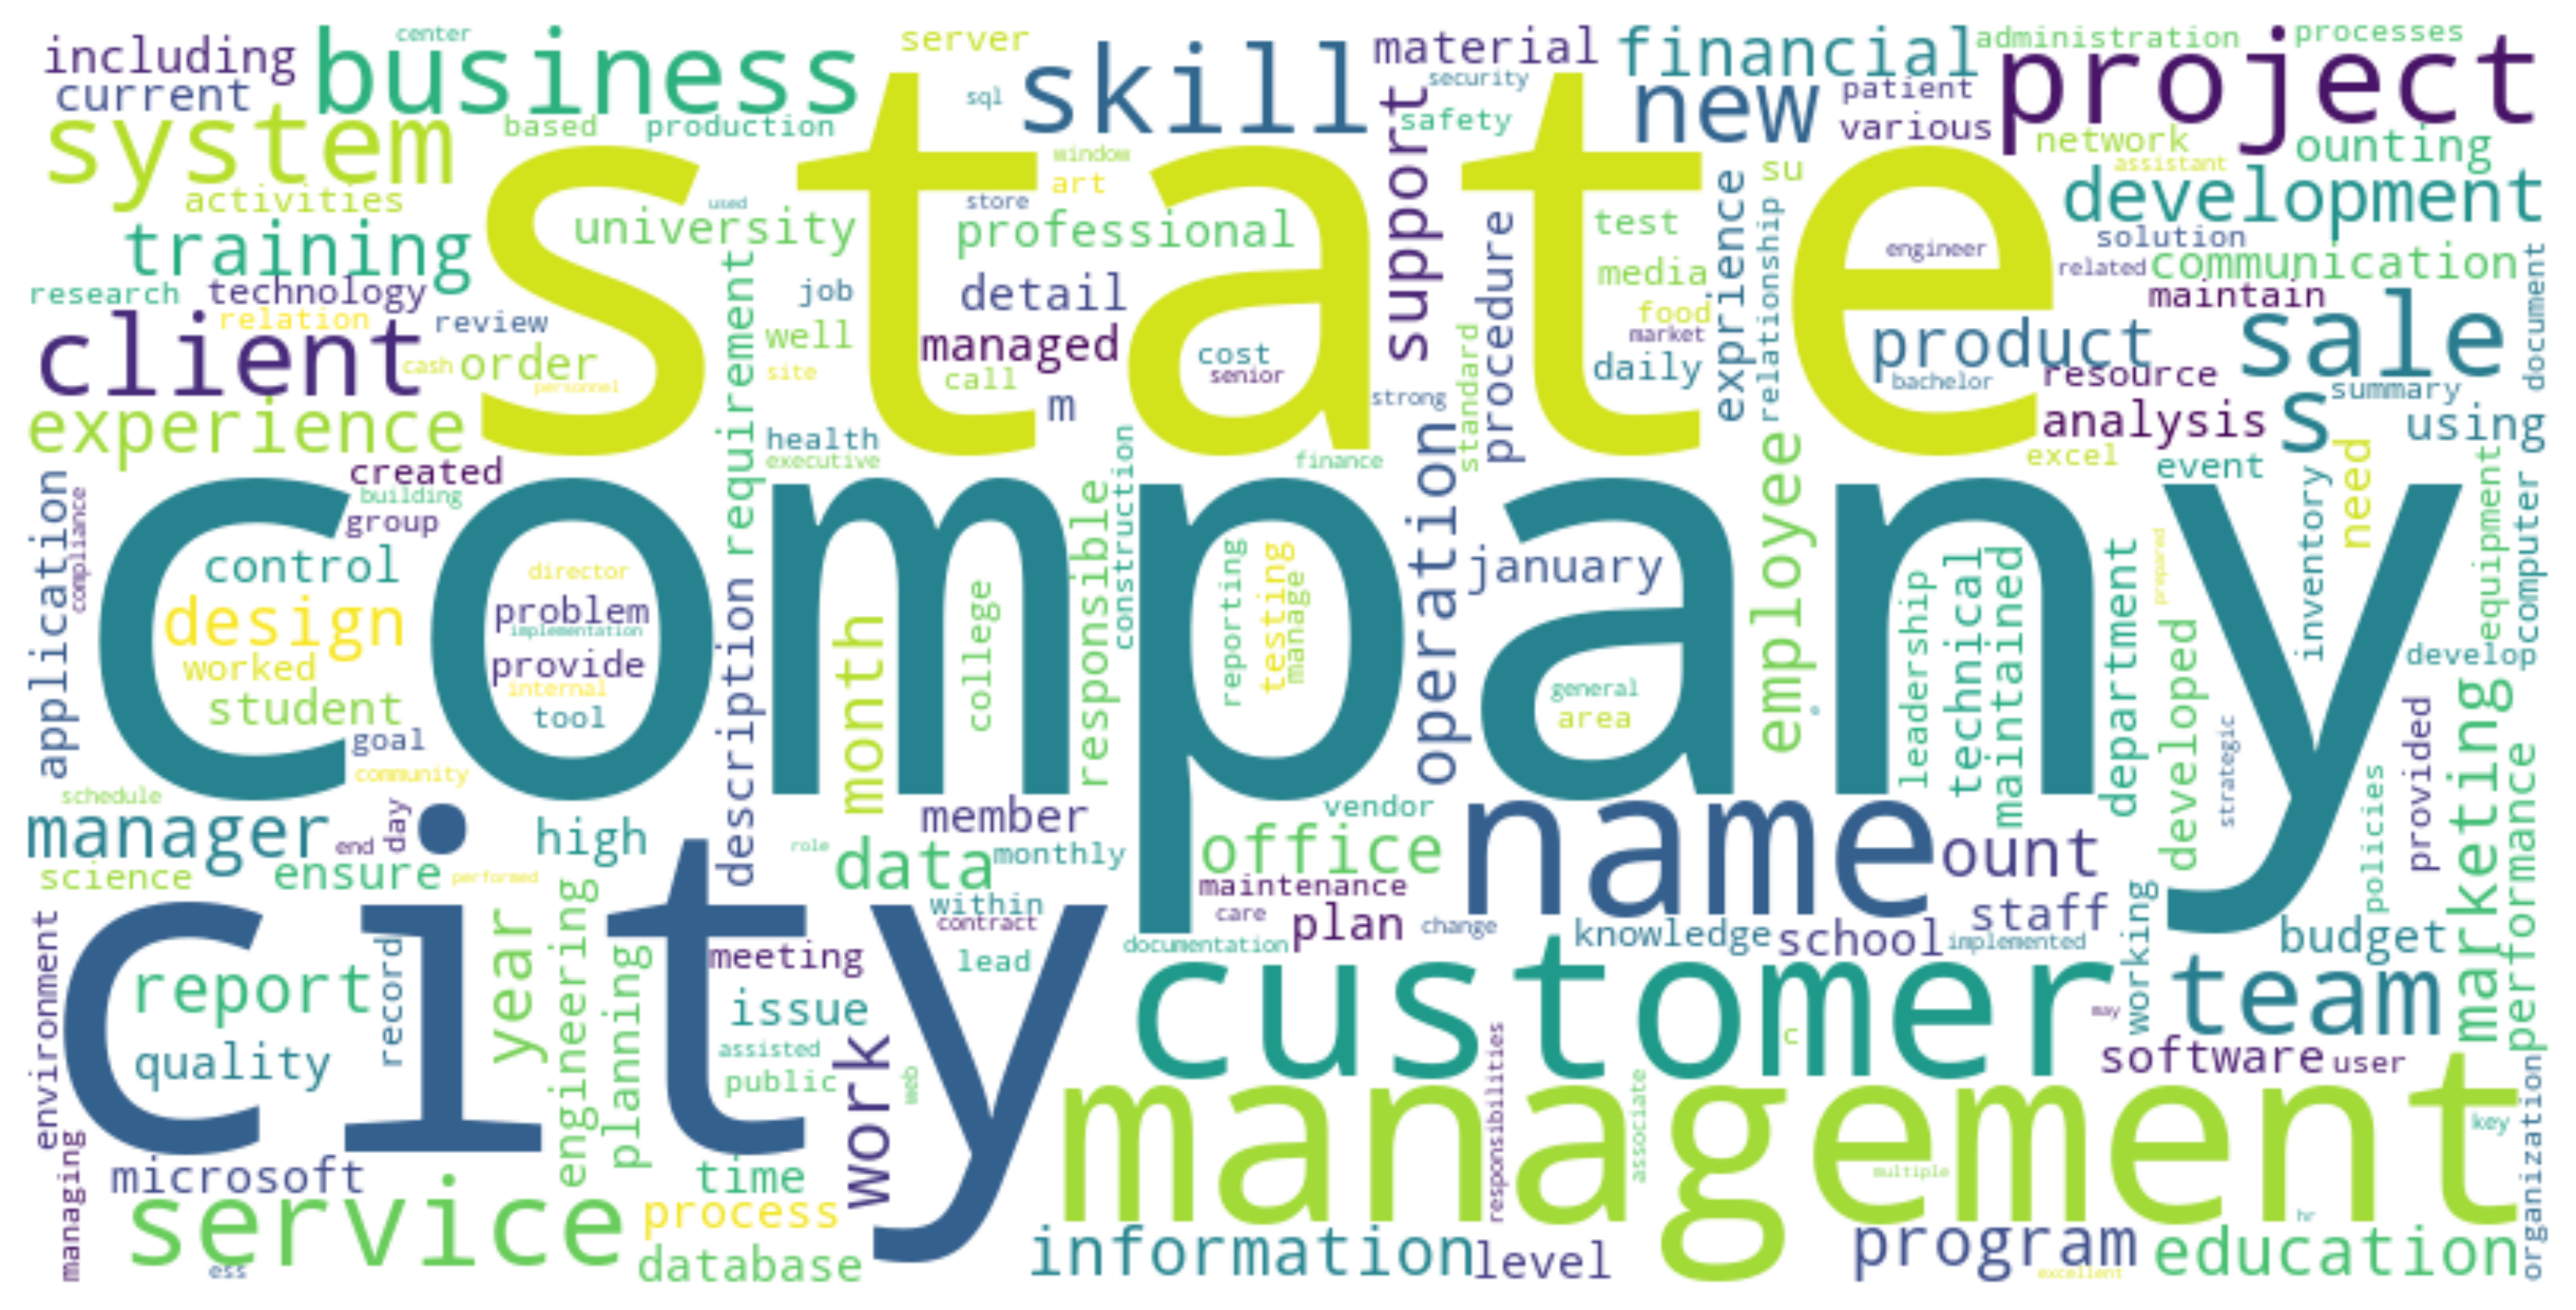

In [25]:
wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(cleaned_sentences)
plt.figure(figsize=(12,6), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

#### Encoding 

In [26]:
la = LabelEncoder()
df['Category_encoded'] = la.fit_transform(df['Category'])

In [27]:
df.sample(5)

,Resume,Category,Cleaned_Resume,Category_encoded
741,BUSINESS OFFICE MANAGER Profess...,HEALTHCARE,business office manager professional summary ...,30
1750,QA ENGINEERING MANAGER Prof...,ENGINEERING,qa engineering manager professional summary s...,25
1259,VICE-PRESIDENT DATA AND MARKETING TEC...,DIGITAL-MEDIA,vice president data and marketing technology ...,20
1886,PROJECT ACCOUNTANT Summary ...,ACCOUNTANT,project accountant summary quality focused a ...,0
675,BUSINESS DEVELOPMENT REPRESENTATIVE ...,BUSINESS-DEVELOPMENT,business development representative professio...,12


In [28]:
# #determining the name of the file
# file_name = 'Resume3.xlsx'
# df.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

In [29]:
df = pd.read_excel('Resume3.xlsx')

In [30]:
df.head()

,Unnamed: 0,Resume,Category,Cleaned_Resume,Category_encoded
0,0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...,31
1,1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...,31
2,2,HR DIRECTOR Summary Over 2...,HR,hr director summary over 20 years experience ...,31
3,3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...,31
4,4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...,31


In [31]:
df['Cleaned_Resume'][0]

' hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill a shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist a omplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification a omplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketing

In [32]:
# create list of all categories
categories = np.sort(df['Category'].unique())
print(categories)

['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'Advocate' 'Arts' 'Automation Testing' 'BANKING' 'BPO'
 'BUSINESS-DEVELOPMENT' 'Blockchain' 'Business Analyst' 'CHEF'
 'CONSTRUCTION' 'CONSULTANT' 'Civil Engineer' 'DESIGNER' 'DIGITAL-MEDIA'
 'Data Science' 'Database' 'DevOps Engineer' 'DotNet Developer'
 'ENGINEERING' 'ETL Developer' 'Electrical Engineering' 'FINANCE'
 'FITNESS' 'HEALTHCARE' 'HR' 'Health and fitness' 'INFORMATION-TECHNOLOGY'
 'Java Developer' 'Mechanical Engineer' 'Network Security Engineer'
 'Operations Manager' 'PMO' 'PUBLIC-RELATIONS' 'Python Developer' 'SALES'
 'SAP Developer' 'Sales' 'TEACHER' 'Testing' 'Web Designing']


In [33]:
encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])

In [34]:
df['Category_encoded'].unique()

array([31, 19, 33, 44,  1, 12, 30, 29,  2, 11, 41, 17, 20,  5, 15, 28,  3,
       25,  0, 16, 39, 10,  4,  6, 21,  7,  8, 46, 35, 43, 32, 18, 34, 14,
       42,  9, 27, 37, 40, 23, 36, 38, 22, 26, 24, 13, 45])

In [35]:
# Split data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(df['Cleaned_Resume'], df['Category'], test_size=0.15, random_state=42, stratify=df['Category'])

In [36]:
# Print the sizes of the split datasets
print("Train data size:", X_train.shape)
print("Validation data size:", X_valid.shape)

Train data size: (2927,)
Validation data size: (517,)


#### TfidfVectorizer

#### Vectorization of TF-IDF
Now, we are vectorization the "Cleaned_resume" column text using TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a numerical representation used in natural language processing and information retrieval to measure the importance of a word within a document relative to a collection of documents. It combines the frequency of a term (word) in a document (TF) with its rarity across the entire document collection (IDF).

In [37]:
# create tf-idf model. and set te max_fatures 800.
tfidf = TfidfVectorizer(stop_words='english',max_features=800)
#fit and transfrom all dataset
tfidf_train_vectors = tfidf.fit_transform(X_train)
tfidf_valid_vectors = tfidf.transform(X_valid)

In [38]:
tfidf_train_vectors.shape

(2927, 800)

In [39]:
# extracting feature names
tfidf.get_feature_names_out()

array(['000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '100', '11', '12', '15', '1998', '1999', '20', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '24', '30', 'ability', 'able', 'academic', 'achieve',
       'achieved', 'action', 'active', 'activities', 'activity',
       'additional', 'administration', 'administrative', 'administrator',
       'adobe', 'advanced', 'advertising', 'agency', 'air', 'aircraft',
       'american', 'analysis', 'analyst', 'analytical', 'analytics',
       'analyze', 'analyzed', 'analyzing', 'annual', 'application',
       'applications', 'appropriate', 'april', 'area', 'areas', 'art',
       'arts', 'aspects', 'assessment', 'assigned', 'assist',
       'assistance', 'assistant', 'assisted', 'assisting', 'associate',
       'associates', 'association', 'assurance', 'audit', 'audits',
       'august', 'automa

In [40]:
# store all model and accuracy values
accuracy_lis=[]
model_lis=[]

#### Random Forest Classifier

In [41]:
rf = RandomForestClassifier()

rf.fit(tfidf_train_vectors,y_train)
# Predict on validation data
y_val_pred = rf.predict(tfidf_valid_vectors)


# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

accuracy=accuracy_score(y_valid, y_val_pred)
print("Accuracy is : ", accuracy)

# store info
model_lis.append("Random Forest Classifier")
accuracy_lis.append(accuracy*100)

Classification Report (Validation Data):

                           precision    recall  f1-score   support

               ACCOUNTANT       0.71      0.83      0.77        18
                 ADVOCATE       0.43      0.33      0.38        18
              AGRICULTURE       1.00      0.22      0.36         9
                  APPAREL       0.60      0.20      0.30        15
                     ARTS       0.50      0.13      0.21        15
               AUTOMOBILE       0.00      0.00      0.00         5
                 AVIATION       0.87      0.76      0.81        17
                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
                  BANKING       0.60      0.71      0.65        17
                      BPO       0.00      0.00      0.00         3
     BUSINESS-DEVELOPMENT       0.47      0.50      0.49        18
               Bloc

#### Logistic Regression

In [42]:
la = LogisticRegression()

la.fit(tfidf_train_vectors, y_train)
y_val_pred = la.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

accuracy = accuracy_score(y_valid, y_val_pred)
print("Accuracy is : ", accuracy)

model_lis.append("Logistic Regression")
accuracy_lis.append(accuracy*100)

Classification Report (Validation Data):

                           precision    recall  f1-score   support

               ACCOUNTANT       0.76      0.72      0.74        18
                 ADVOCATE       0.36      0.50      0.42        18
              AGRICULTURE       1.00      0.22      0.36         9
                  APPAREL       0.54      0.47      0.50        15
                     ARTS       0.73      0.53      0.62        15
               AUTOMOBILE       0.00      0.00      0.00         5
                 AVIATION       0.74      0.82      0.78        17
                 Advocate       1.00      0.67      0.80         3
                     Arts       0.83      1.00      0.91         5
       Automation Testing       1.00      1.00      1.00         4
                  BANKING       0.67      0.71      0.69        17
                      BPO       0.00      0.00      0.00         3
     BUSINESS-DEVELOPMENT       0.52      0.61      0.56        18
               Bloc

#### K-Nearest Neighbors

In [43]:
# Initialize KNN classifier
k = 24 # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = knn_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

accuracy = accuracy_score(y_valid, y_val_pred)
print("Accuracy is : ", accuracy)

# store info
model_lis.append("K Nearest Neighbors")
accuracy_lis.append(accuracy*100)

Classification Report (Validation Data):

                           precision    recall  f1-score   support

               ACCOUNTANT       0.52      0.78      0.62        18
                 ADVOCATE       0.35      0.33      0.34        18
              AGRICULTURE       1.00      0.22      0.36         9
                  APPAREL       0.56      0.33      0.42        15
                     ARTS       0.71      0.33      0.45        15
               AUTOMOBILE       0.00      0.00      0.00         5
                 AVIATION       0.75      0.53      0.62        17
                 Advocate       1.00      0.67      0.80         3
                     Arts       0.50      0.20      0.29         5
       Automation Testing       0.75      0.75      0.75         4
                  BANKING       0.58      0.41      0.48        17
                      BPO       0.00      0.00      0.00         3
     BUSINESS-DEVELOPMENT       0.38      0.72      0.50        18
               Bloc

#### Naive Bayes

In [44]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_vectors,y_train)

y_val_pred = nb_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Naive Bayes")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

                           precision    recall  f1-score   support

               ACCOUNTANT       0.67      0.78      0.72        18
                 ADVOCATE       0.36      0.44      0.40        18
              AGRICULTURE       1.00      0.11      0.20         9
                  APPAREL       0.75      0.20      0.32        15
                     ARTS       0.67      0.27      0.38        15
               AUTOMOBILE       0.00      0.00      0.00         5
                 AVIATION       0.77      0.59      0.67        17
                 Advocate       1.00      0.33      0.50         3
                     Arts       0.83      1.00      0.91         5
       Automation Testing       1.00      0.25      0.40         4
                  BANKING       0.75      0.71      0.73        17
                      BPO       0.00      0.00      0.00         3
     BUSINESS-DEVELOPMENT       0.50      0.78      0.61        18
               Bloc

#### Support Vector Machine

In [45]:
svm_classifier = SVC()
svm_classifier.fit(tfidf_train_vectors,y_train)
y_val_pred = svm_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Support Vector Machine")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

                           precision    recall  f1-score   support

               ACCOUNTANT       0.76      0.72      0.74        18
                 ADVOCATE       0.29      0.50      0.37        18
              AGRICULTURE       0.75      0.33      0.46         9
                  APPAREL       0.64      0.47      0.54        15
                     ARTS       0.70      0.47      0.56        15
               AUTOMOBILE       0.00      0.00      0.00         5
                 AVIATION       0.80      0.71      0.75        17
                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         4
                  BANKING       0.67      0.71      0.69        17
                      BPO       0.00      0.00      0.00         3
     BUSINESS-DEVELOPMENT       0.54      0.72      0.62        18
               Bloc

In [46]:
# Create a DataFrame
accuracy_data = pd.DataFrame({'model': model_lis, 'accuracy': accuracy_lis})

In [47]:
accuracy_data

,model,accuracy
0,Random Forest Classifier,75.048356
1,Logistic Regression,75.435203
2,K Nearest Neighbors,61.508704
3,Naive Bayes,65.183752
4,Support Vector Machine,73.887814


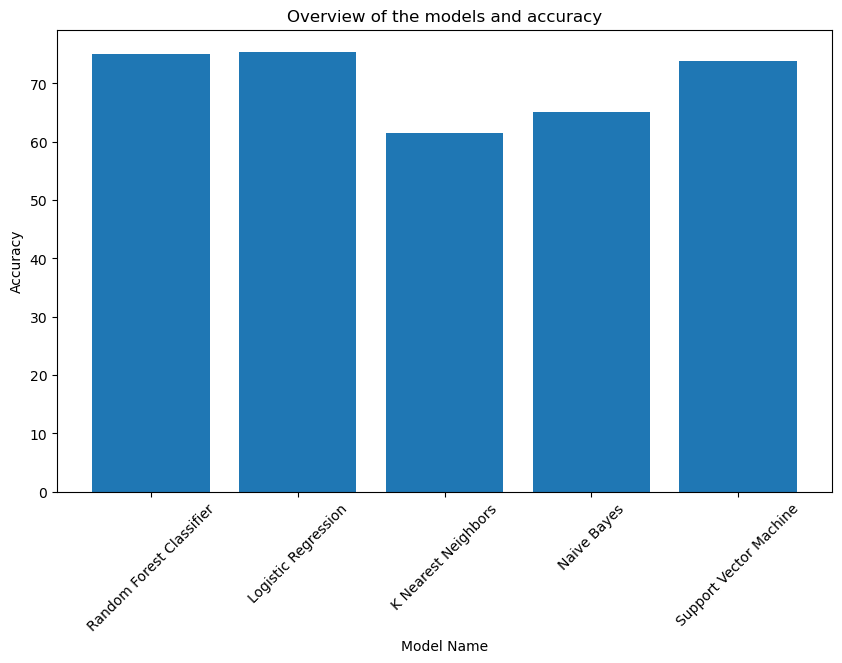

In [48]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accuracy_data['model'], accuracy_data['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Overview of the models and accuracy')
plt.show()

#### An unexpected challenge arose with this dataset, which contains 46 class labels, making it inherently complex and difficult to handle. During training, some class labels had significantly fewer data points than the total categorization types. This imbalance led to certain classes being underrepresented, resulting in zero precision, recall, and F1-scores for those categories. Consequently, the model's overall accuracy was impacted. Despite these limitations, the **Random Forest Classifier** emerged as the top-performing model with an accuracy of **76.02%**, showcasing its ability to manage the dataset's complexity better than other models.

In [58]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(rf,open('best_clf.pkl', 'wb'))
pickle.dump(encoder,open('label_encoder.pkl', 'wb'))

In [59]:
# Create a dictionary mapping category names to encoded labels
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [51]:
# this is just for our script.py
category_mapping 

{'ACCOUNTANT': 0,
 'ADVOCATE': 1,
 'AGRICULTURE': 2,
 'APPAREL': 3,
 'ARTS': 4,
 'AUTOMOBILE': 5,
 'AVIATION': 6,
 'Advocate': 7,
 'Arts': 8,
 'Automation Testing': 9,
 'BANKING': 10,
 'BPO': 11,
 'BUSINESS-DEVELOPMENT': 12,
 'Blockchain': 13,
 'Business Analyst': 14,
 'CHEF': 15,
 'CONSTRUCTION': 16,
 'CONSULTANT': 17,
 'Civil Engineer': 18,
 'DESIGNER': 19,
 'DIGITAL-MEDIA': 20,
 'Data Science': 21,
 'Database': 22,
 'DevOps Engineer': 23,
 'DotNet Developer': 24,
 'ENGINEERING': 25,
 'ETL Developer': 26,
 'Electrical Engineering': 27,
 'FINANCE': 28,
 'FITNESS': 29,
 'HEALTHCARE': 30,
 'HR': 31,
 'Health and fitness': 32,
 'INFORMATION-TECHNOLOGY': 33,
 'Java Developer': 34,
 'Mechanical Engineer': 35,
 'Network Security Engineer': 36,
 'Operations Manager': 37,
 'PMO': 38,
 'PUBLIC-RELATIONS': 39,
 'Python Developer': 40,
 'SALES': 41,
 'SAP Developer': 42,
 'Sales': 43,
 'TEACHER': 44,
 'Testing': 45,
 'Web Designing': 46}

# Check ATS score According to the JD 

In [52]:
# def preprocess_text(text):
#     text = re.sub('http\S+\s*', ' ', text)  # remove URLs
#     text = re.sub('RT|cc', ' ', text)  # remove RT and cc
#     text = re.sub('#\S+', '', text)  # remove hashtags
#     text = re.sub('@\S+', '  ', text)  # remove mentions
#     text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
#     text = re.sub(r'[^\x00-\x7f]',r' ', text) 
#     text = re.sub('\s+', ' ', text)  # remove extra whitespace
#     return text.lower()

# # Calculate ATS score based on resume and job description
# def calculate_ats_score(resume_text, job_description_text):
#     # Preprocess the resume and job description
#     resume_text = preprocess_text(resume_text)
#     job_description_text = preprocess_text(job_description_text)
    
#     # Create TF-IDF vectors for both resume and job description
#     tfidf = TfidfVectorizer(stop_words='english')
#     tfidf_matrix = tfidf.fit_transform([resume_text, job_description_text])
    
#     # Calculate cosine similarity between the resume and job description
#     cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
#     # ATS score is based on cosine similarity (higher score means better match)
#     ats_score = cosine_sim[0][0] * 100  # Convert to percentage
#     return ats_score

In [53]:
# job_description_text = input("Please enter Job Description: ")
# resume_text = input("Please enter your resume text: ")

# # Calculate ATS score
# ats_score = calculate_ats_score(resume_text, job_description_text)
# print(f"ATS Score: {ats_score:.2f}%")

In [54]:
def preprocess_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()


# Function to predict category
def predict_category(job_description_text):
    # Preprocess the resume text
    resume_text = preprocess_text(job_description_text)
    # Transform the text using the trained TF-IDF vectorizer
    tfidf_vector = tfidf.transform([job_description_text])
    # Predict the encoded category
    category_encoded = rf.predict(tfidf_vector)[0]
    # Check if the prediction is valid
    if category_encoded not in range(len(encoder.classes_)):
        raise ValueError(f"{category_encoded}")
    # Decode the category to its original label
    return encoder.inverse_transform([category_encoded])[0]


# Calculate ATS score based on resume and job description
def calculate_ats_score(resume_text, job_description_text):
    # Preprocess the resume and job description
    resume_text = preprocess_text(resume_text)
    job_description_text = preprocess_text(job_description_text)
    
    # Create TF-IDF vectors for both resume and job description
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform([resume_text, job_description_text])
    
    # Calculate cosine similarity between the resume and job description
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
    # ATS score is based on cosine similarity (higher score means better match)
    ats_score = cosine_sim[0][0] * 100  # Convert to percentage
    return ats_score

In [55]:
job_description_text = input("Please enter Job Description: ")
resume_text = input("Please enter your resume text: ")

try:
    # Predict category
    predicted_category = predict_category(job_description_text)
    print(f"Predicted Category: {predicted_category}")
except ValueError as e:
    print(f"Predicted Category : {e}")
    
# Calculate ATS score
ats_score = calculate_ats_score(resume_text, job_description_text)
print(f"ATS Score: {ats_score:.2f}%")

Please enter Job Description: Key Features of the Updated Code: Error Handling: The predicted_category is initialized with "Unknown" to avoid undefined variable errors. PDF Text Extraction: Proper handling for PDF files using PyPDF2. Input Preprocessing: Ensures both job_description and resume_text are cleaned and standardized. Cosine Similarity Calculation: Uses a new TfidfVectorizer instance to calculate the similarity score. Flask API Endpoint: Handles form data and file uploads gracefully.
Please enter your resume text: Key Features of the Updated Code: Error Handling: The predicted_category is initialized with "Unknown" to avoid undefined variable errors. PDF Text Extraction: Proper handling for PDF files using PyPDF2. Input Preprocessing: Ensures both job_description and resume_text are cleaned and standardized. Cosine Similarity Calculation: Uses a new TfidfVectorizer instance to calculate the similarity score. Flask API Endpoint: Handles form data and file uploads gracefully.
P

In [56]:
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import pickle

# # Function to preprocess text
# def preprocess_text(text):
#     text = re.sub('http\S+\s*', ' ', text)  # remove URLs
#     text = re.sub('RT|cc', ' ', text)  # remove RT and cc
#     text = re.sub('#\S+', '', text)  # remove hashtags
#     text = re.sub('@\S+', ' ', text)  # remove mentions
#     text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
#     text = re.sub(r'[^\x00-\x7f]', r' ', text) 
#     text = re.sub('\s+', ' ', text)  # remove extra whitespace
#     return text.lower()

# # Function to predict category
# def predict_category(resume_text, tfidf, rf, encoder):
#     # Preprocess the resume
#     cleaned_resume = preprocess_text(resume_text)
    
#     # Create TF-IDF vector for the resume
#     tfidf_matrix = tfidf.transform([cleaned_resume])
    
#     # Predict the category using Random Forest classifier
#     predicted_encoded_category = rf.predict(tfidf_matrix)
    
#     # Debugging: Print the predicted encoded category
#     print(f"Predicted Encoded Category: {predicted_encoded_category}")
    
#     # Debugging: Print the classes known to the encoder
#     print(f"Known Classes: {encoder.classes_}")
    
#     # Decode the predicted category back to original label
#     predicted_category = encoder.inverse_transform(predicted_encoded_category)
    
#     return predicted_category[0]

# # Function to calculate ATS score
# def calculate_ats_score(resume_text, job_description_text, tfidf):
#     # Preprocess the resume and job description
#     resume_text = preprocess_text(resume_text)
#     job_description_text = preprocess_text(job_description_text)
    
#     # Create TF-IDF vectors for both resume and job description
#     tfidf_matrix = tfidf.transform([resume_text, job_description_text])
    
#     # Calculate cosine similarity between the resume and job description
#     cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
#     # ATS score is based on cosine similarity (higher score means better match)
#     ats_score = cosine_sim[0][0] * 100  # Convert to percentage
#     return ats_score

# # Load your vectorizer, model, and encoder here (assuming they were saved)
# # tfidf = pickle.load(open('tfidf.pkl', 'rb'))
# # rf = pickle.load(open('best_clf.pkl', 'rb'))
# # encoder = pickle.load(open('encoder.pkl', 'rb'))

# job_description_text = input("Please enter Job Description: ")
# resume_text = input("Please enter your resume text: ")

# # Predict the category
# predicted_category = predict_category(resume_text, tfidf, rf, encoder)
# print(f"Predicted Category: {predicted_category}")

# # Calculate ATS score
# ats_score = calculate_ats_score(resume_text, job_description_text, tfidf)
# print(f"ATS Score: {ats_score:.2f}%")

In [57]:
# # Function to predict category using the trained model
# def predict_category(resume_text, model, vectorizer, encoder):
#     # Clean the resume text
#     cleaned_resume = data_clean(resume_text)
#     # Vectorize the cleaned resume
#     resume_vector = vectorizer.transform([cleaned_resume])
#     # Predict the category
#     predicted_category_encoded = model.predict(resume_vector)
    
#     try:
#         # Try to inverse transform the encoded category
#         predicted_category = encoder.inverse_transform(predicted_category_encoded)
#     except ValueError as e:
#         # If a new label is encountered, handle it by assigning a default category
#         print(f"Unseen category encountered: {e}. Assigning 'Unknown' category.")
#         predicted_category = ['Unknown']
    
#     return predicted_category[0]

# # Function to predict the quality score of the resume (optional model)
# def predict_quality(resume_text, quality_model, vectorizer):
#     # Clean and vectorize the resume text
#     cleaned_resume = data_clean(resume_text)
#     resume_vector = vectorizer.transform([cleaned_resume])
#     # Predict quality score (this could be a regression model to provide a score)
#     quality_score = quality_model.predict(resume_vector)
#     return quality_score[0]  # Return the quality score directly

# # Function to process resume and predict both category and quality
# def process_resume(resume_text, model, vectorizer, encoder, quality_model=None):
#     category = predict_category(resume_text, model, vectorizer, encoder)
#     quality_score = predict_quality(resume_text, quality_model, vectorizer) if quality_model else None
#     return category, quality_score

# # Calculate ATS score based on resume and job description
# def calculate_ats_score(resume_text, job_description_text):
#     # Preprocess the resume and job description
#     resume_text = preprocess_text(resume_text)
#     job_description_text = preprocess_text(job_description_text)
    
#     # Create TF-IDF vectors for both resume and job description
#     tfidf = TfidfVectorizer(stop_words='english')
#     tfidf_matrix = tfidf.fit_transform([resume_text, job_description_text])
    
#     # Calculate cosine similarity between the resume and job description
#     cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
#     # ATS score is based on cosine similarity (higher score means better match)
#     ats_score = cosine_sim[0][0] * 100  # Convert to percentage
#     return ats_score

# # Example: Loading pre-trained models (You should load your actual models here)
# # Example: Assume rf is a random forest classifier, tfidf is a vectorizer, and encoder is a label encoder
# # Replace these with your actual models.
# from sklearn.ensemble import RandomForestClassifier


# # Assuming the quality model is the random forest classifier
# quality_model = rf  
# job_description_text = input("Please enter Job Description: ")
# resume_text = input("Please enter your resume text: ")
# # Predict category and quality score
# predicted_category, predicted_quality_score = process_resume( rf, tfidf, encoder, quality_model)

# # Output predicted category and quality score
# print(f"Predicted Category: {predicted_category}")
# if predicted_quality_score is not None:
#     print(f"Predicted Quality Score: {predicted_quality_score}")

# # Calculate ATS score
# ats_score = calculate_ats_score(resume_text, job_description_text)
# print(f"ATS Score: {ats_score:.2f}%")
